<a href="https://colab.research.google.com/github/neelindresh/OmdenaMarsSurface/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r OmdenaMarsSurface/

In [0]:
!git clone https://github.com/neelindresh/OmdenaMarsSurface.git

Cloning into 'OmdenaMarsSurface'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
!ls OmdenaMarsSurface/DataSet/

pia21454.jpg  pia22241-1041.jpg  pia22587.jpg


In [0]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [0]:
image = cv2.imread('OmdenaMarsSurface/DataSet/pia21454.jpg',cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

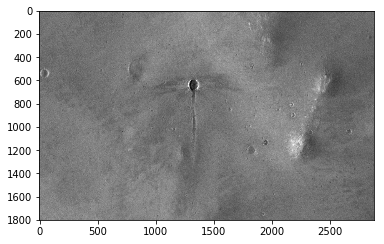

In [0]:
plt.imshow(image,cmap='gray')

In [0]:
imgboth = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

In [0]:
def findEdges(image,kernal=None):
  if kernal==None:
    kernal=9
  sobelx = cv2.Sobel(image,cv2.CV_64F,2,0,ksize=kernal)
  sobelx = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=kernal)
  return sobelx,sobelx

In [0]:
def clusterImages(image,n_segments=50,compactness=10,sigma=1,markers=250,marker_compact=0.1):
  from skimage.data import astronaut
  from skimage.color import rgb2gray
  from skimage.segmentation import  slic, watershed
  from skimage.segmentation import mark_boundaries
  from skimage.util import img_as_float
  segments_slic = slic(image, n_segments=n_segments, compactness=compactness, sigma=sigma)
  gradient = sobel(rgb2gray(image))
  segments_watershed = watershed(gradient, markers=markers, compactness=marker_compact)
  print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
  markImage=mark_boundaries(image,segments_slic)
  return markImage

In [0]:
def combineEdge(ximg,yimg):
  imgboth = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
  return imgboth

In [0]:
ximag,yimg=findEdges(image,kernal=15)

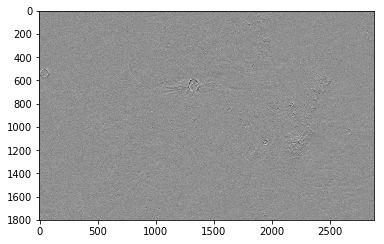

In [0]:
plt.imshow(ximag,cmap='gray')

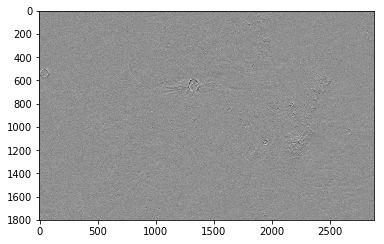

In [0]:
plt.imshow(yimg,cmap='gray')